 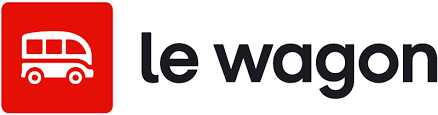

# Financial returns

Python's versatility, combined with its powerful libraries, makes it the best suited language for **financial data analysis**. 🏦🐍

In this challenge, we aim to visualize the fluctuations in share prices over time 📈📉.

## Data exploration


Execute the cell below to load financial data into a`df` variable

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
df.head()

Have a look at the data types by using the `.info()`method.


In [ ]:
#your code here

Display **statistical information** by using the appropriate function.


In [ ]:
#your code here

Convert the `Date` column to **datetime** format.

In [ ]:
#your code here

Now, we need to have a closer look at `Date` column.

Is it continuous? Or are there some missing days?

Count the number of rows per day of the week in the dataset.

<details>
    <summary>Hint 🔍</summary>

- you can extract the day of the week of a datetime object by calling the `.dayofweek`attribute.
- the `value_counts()` method can also help you (see [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html))

</details>

In [ ]:
#your code here

What do you notice ?

> **Your Answer Here (Double click)**


Use the `.isocalendar()` method on the Date column. What type of object does it output?

In [ ]:
#your code here

Filter `df`on January and December Data

<details>
    <summary> Hint 🔍 </summary>

- First, you need to extract the `month` from the Date column
- Have a look at the Dataframe `.isin()`method to filter on more than one value

</details>

In [ ]:
#your code here

## Resampling and returns

Set the `Date`column as index.


In [ ]:
#your code here

By using the **.resample()** function, compute  the `AAPL.Open` minimum value and `AAPL.Close` median value per quarter.

<details>
    <summary> Hint 🔍 </summary>

To apply more than one aggregate function,  you can use the `.agg()` method.

</details>

In [ ]:
#your code here

Calculate the daily returns by using the `.pct_change()` method on `AAPL.Close`.


In [ ]:
#your code here

What does this line of code do ?

In [ ]:
df.resample("QS").first()[["AAPL.Open", "AAPL.Close"]].pct_change(4)

> **Your Answer Here (Double click)**

Imagine the time saved in comparison with Excel! 🔥


Compute the quarterly mean evolution of the `AAPL.Close`

In [ ]:
#your code here

## Window functions

Compute the moving average of `AAPL.Close` **over the last 4 rolling days**.


In [ ]:
#your code here

The `.rolling()` method allows us to specify a time window and not simply a number of previous rows. \
This is convenient to get rid of the NaN on the first rows.

Compute the moving average of `AAPL.Close` **using a sliding 30-day window**.

In [ ]:
df["AAPL.Close"].rolling("30D").mean()


## Missing values

We are lacking Week-end days in our dataset.

To fill the gaps in our index dates, we can use the DataFrame `.asfreq()`method. \
Have a look at the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.asfreq.html) and create a new DataFrame called `df_with_weekends` that includes the week end days.

Display the 14 first rows. What do you notice ?


In [ ]:
#your code here

We need to get rid of all the NaNs generated by the `asfreq()`function.

Have a look at the `fillna()` method [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna), and use it to replace the missing values with the **next valid value**.

⚠️ Do not reassign the value to `df_with_weekends`.


In [ ]:
#your code here

Another method to replace missing values is to use [interpolation](https://en.wikipedia.org/wiki/Interpolation).

Have a look at the `interpolate()` method and use it to replace the missing values. \
You can update your `df_with_weekends` variable.


In [ ]:
#your code here

## Financial charts

Time to step our charting game up! 📈📉

Up to this point, we focused our efforts on Apple share only. We are now going to include shares from multiple companies, crafting the kind of essential graphs that traders need for their decisions.

**You're about to discover why Python has earned its reputation in the financial world.** 🏦


<u>Note:</u> A **ticker** is an abbreviation used to designate a specific share on a specific stock market (**eg.** *AAPL* for Apple, *TSLA* for Tesla etc.)



---




Execute the cell below to load data from multiple tickers.

Note that the values have been rebased on Day One. In other words, what you're observing is the return instead of the original ticker value.

In [ ]:
df = px.data.stocks()

df["date"] = pd.to_datetime(df["date"], format='%Y-%m-%d', errors='coerce')
df = df.set_index("date")
df

Display the evolution of `GOOG`  with a line plot.

In [ ]:
#your code here

Display **on the same chart** the evolution of GOOG with its minimum and maximum cumulative value.


<details>
    <summary>Hint 🔍</summary>
    
- Have a look at the `cummin()` and `cummax()` methods.
- To add a line to a Plotly chart, you can use the `.add_scatter()` method.


In [ ]:
# your code

Display **on the same chart** the evolution of GOOG and its 10-day and 30-day moving averages.

<details>
    <summary>Hint 🔍</summary>

you might want to use the `.rolling()` method here

</details>

In [ ]:
# your code

___

We will now display returns for each ticker in separate charts.

The `pd.melt()` function can transform a wide-format table into a longer, more structured format. \
It takes variables from columns and reshapes them into rows, creating a new column for variable names and another for their corresponding values.

Run the following cell.

In [ ]:
df_melt = pd.melt(df, var_name="ticker", ignore_index=False)
df_melt

Using the `px.area()` function on the newly created DataFrame, display the returns for each ticker **in separate charts**.

<details>
    <summary> Hint 🔍 </summary>
    
A very similar example was shown in the lecture notebook.

Now might be a good time to remind yourself what `facet_col` can do!

</details>


In [ ]:
#your code here